In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sb
import math
from collections import Counter
import operator

columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [2]:
set_data = pd.read_csv('20 Percent Training Set.csv', quotechar=',', skipinitialspace=True, names= columns)# -*- coding: utf-8 -*-
set_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,19.487695
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,2.328541
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [3]:
mapping_attacktypes = {
         'normal': 0,
        'back': 1,
        'land': 1,
        'neptune': 1,
        'pod': 1,
        'smurf': 1,
        'teardrop': 1,
        'mailbomb': 1,
        'apache2': 1,
        'processtable': 1,
        'udpstorm': 1,
        'ipsweep': 1,
        'nmap': 1,
        'portsweep': 1,
        'satan': 1,
        'mscan': 1,
        'saint': 1,
        'ftp_write': 1,
        'guess_passwd': 1,
        'imap': 1,
        'multihop': 1,
        'phf': 1,
        'spy': 1,
        'warezclient': 1,
        'warezmaster': 1,
        'sendmail': 1,
        'named': 1,
        'snmpgetattack': 1,
        'snmpguess': 1,
        'xlock': 1,
        'xsnoop': 1,
        'worm': 1,
        'buffer_overflow': 1,
        'loadmodule': 1,
        'perl': 1,
        'rootkit': 1,
        'httptunnel': 1,
        'ps': 1,
        'sqlattack': 1,
        'xterm': 1
    }# -*- coding: utf-8 -*-

In [4]:
mapping_type1 = {'SF':0,
'S0':1,
'REJ':2,
'RSTR':3,
'SH':4,
'RSTO':5,
'S1':6,
'RSTOS0':7,
'S3':8,
'S2':9,
'OTH':10}
mapping_type2 = {
'ftp_data':0,
'other':1,
'private':2,
'http':3,
'remote_job':4,
'name':5,
'netbios_ns':6,
'eco_i':7,
'mtp':8,
'telnet':9,
'finger':10,
'domain_u':11,
'supdup':12,
'uucp_path':13,
'Z39_50':14,
'smtp':15,
'csnet_ns':16,
'uucp':17,
'netbios_dgm':18,
'urp_i':19,
'auth':20,
'domain':21,
'ftp':22,
'bgp':23,
'ldap':24,
'ecr_i':25,
'gopher':26,
'vmnet':27,
'systat':28,
'http_443':29,
'efs':30,
'whois':31,
'imap4':32,
'iso_tsap':33,
'echo':34,
'klogin':35,
'link':36,
'sunrpc':37,
'login':38,
'kshell':39,
'sql_net':40,
'time':41,
'hostnames':42,
'exec':43,
'ntp_u':44,
'discard':45,
'nntp':46,
'courier':47,
'ctf':48,
'ssh':49,
'daytime':50,
'shell':51,
'netstat':52,
'pop_3':53,
'nnsp':54,
'IRC':55,
'pop_2':56,
'printer':57,
'tim_i':58,
'pm_dump':59,
'red_i':60,
'netbios_ssn':61,
'rje':62,
'X11':63,
'urh_i':64,
'http_8001':65}

In [5]:
set_data['attack_class'] = set_data['attack'].apply(lambda v: mapping_attacktypes[v])
set_data.drop(['attack'], axis=1, inplace=True)
set_data['flags'] = set_data['flag'].apply(lambda v: mapping_type1[v])
set_data.drop(['flag'], axis=1, inplace=True)
set_data['services'] = set_data['service'].apply(lambda v: mapping_type2[v])
set_data.drop(['service'], axis=1, inplace=True)
#Removing redundant data
set_data.drop(['num_outbound_cmds'], axis=1, inplace=True)

set_data['attack_class'].value_counts()

0    13449
1    11743
Name: attack_class, dtype: int64

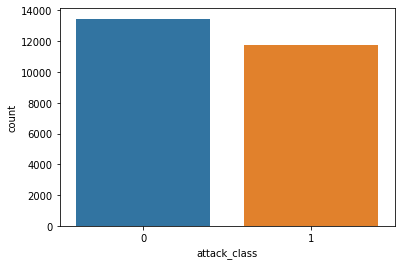

In [6]:
sb.countplot(x = 'attack_class', data = set_data)

In [7]:
set_data.isnull().sum()

duration                       0
protocol_type                  0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_s

In [8]:
features = ['src_bytes',
 'dst_bytes',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'same_srv_rate',
 'count',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'flags',
 'services',
 'attack_class']
X=set_data[features].copy()
X.head()

,src_bytes,dst_bytes,diff_srv_rate,dst_host_diff_srv_rate,same_srv_rate,count,dst_host_same_srv_rate,dst_host_srv_count,flags,services,attack_class
0,491,0,0.00,0.03,1.00,2,0.17,25,0,0,0
1,146,0,0.15,0.60,0.08,13,0.00,1,0,1,0
2,0,0,0.07,0.05,0.05,123,0.10,26,1,2,1
3,232,8153,0.00,0.00,1.00,5,1.00,255,0,3,0
4,199,420,0.00,0.00,1.00,30,1.00,255,0,3,0


In [9]:
from sklearn.preprocessing import StandardScaler
col_names = ['src_bytes',
 'dst_bytes',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'same_srv_rate',
 'count',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'flags',
             'services'
            ]
    #'src_bytes',
 #'dst_bytes',
 #'logged_in',
 #'count',
 #'srv_count',
 #'dst_host_srv_count',
 #'dst_host_diff_srv_rate',
 #'dst_host_same_src_port_rate',
 #'dst_host_serror_rate']
sf = X.copy()
features = sf[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
sf[col_names] = features
X = sf.copy()

In [10]:
X

,src_bytes,dst_bytes,diff_srv_rate,dst_host_diff_srv_rate,same_srv_rate,count,dst_host_same_srv_rate,dst_host_srv_count,flags,services,attack_class
0,-0.009889,-0.039310,-0.349282,-0.280673,0.772109,-0.720244,-0.779157,-0.813985,-0.608778,-0.791865,0
1,-0.010032,-0.039310,0.490836,2.764403,-1.320567,-0.624317,-1.157831,-1.030895,-0.608778,-0.714185,0
2,-0.010093,-0.039310,0.042773,-0.173828,-1.388806,0.334947,-0.935081,-0.804947,0.370679,-0.636504,1
3,-0.009996,0.052473,-0.349282,-0.440940,0.772109,-0.694082,1.069663,1.264742,-0.608778,-0.558824,0
4,-0.010010,-0.034582,-0.349282,-0.440940,0.772109,-0.476067,1.069663,1.264742,-0.608778,-0.558824,0
5,-0.010093,-0.039310,-0.013235,-0.066984,-1.138595,0.317506,-1.001906,-0.868212,1.350136,-0.636504,1
6,-0.010093,-0.039310,-0.013235,-0.173828,-1.388806,0.709933,-1.068731,-0.958592,0.370679,-0.636504,1
7,-0.010093,-0.039310,-0.013235,-0.066984,-1.184088,0.282624,-1.024181,-0.904364,0.370679,-0.636504,1
8,-0.010093,-0.039310,-0.069243,-0.173828,-1.297820,1.616874,-0.957356,-0.832060,0.370679,-0.481143,1
9,-0.010093,-0.039310,-0.013235,-0.120406,-1.366060,0.422153,-1.046456,-0.922440,0.370679,-0.636504,1


In [11]:
train_set = {0:[], 1:[]}
test_set = {0:[], 1:[]}

In [12]:
train_set

{0: [], 1: []}

In [13]:
# splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

In [14]:
Xdatatrain = X_train.astype(float).values.tolist()
Xdatatest = X_test.astype(float).values.tolist()

In [15]:
Xdatatrain

[[-0.009664442692324474,
  -0.03930978546744752,
  -0.34928194284986874,
  -0.38751809673439375,
  0.7721086624557036,
  1.163403273737662,
  0.7355389718262679,
  0.9303383412725491,
  -0.6087781476836542,
  1.150147940132931,
  1.0],
 [-0.010048969124223974,
  -0.03766617725874226,
  2.4511097392334174,
  -0.38751809673439375,
  -0.9338765873850281,
  -0.7028024246104642,
  0.9582883641931281,
  0.8670727452365632,
  -0.6087781476836542,
  -0.63650424616414,
  0.0],
 [-0.009969326109202719,
  -0.008216320587694611,
  -0.34928194284986874,
  -0.44094049640240573,
  0.7721086624557036,
  -0.6504789003577129,
  1.0696630603765584,
  1.2647422060341893,
  -0.6087781476836542,
  -0.5588237163251369,
  0.0],
 [-0.009953978236516331,
  -0.03930978546744752,
  -0.34928194284986874,
  -0.44094049640240573,
  0.7721086624557036,
  -0.7202435993613812,
  1.0696630603765584,
  -0.8139845208624928,
  -0.6087781476836542,
  -0.7918653058421462,
  1.0],
 [-0.010092523898063723,
  -0.039309785467447

In [16]:
Xdatatest

[[-0.009463261117921824,
  -0.03557226543121364,
  -0.34928194284986874,
  0.20012829961373832,
  0.7721086624557036,
  -0.7289641867368397,
  0.22321536938248945,
  0.6411241879651847,
  -0.6087781476836542,
  0.3733426417429001,
  0.0],
 [-0.009953978236516331,
  -0.03930978546744752,
  -0.34928194284986874,
  -0.44094049640240573,
  0.7721086624557036,
  -0.7202435993613812,
  1.0696630603765584,
  -0.6964912710813761,
  -0.6087781476836542,
  -0.7918653058421462,
  1.0],
 [-0.009962274383914378,
  -0.030191137186274506,
  -0.34928194284986874,
  -0.44094049640240573,
  0.7721086624557036,
  -0.5719936139785861,
  1.0696630603765584,
  1.2647422060341893,
  -0.6087781476836542,
  -0.5588237163251369,
  0.0],
 [-0.010092523898063723,
  -0.03930978546744752,
  0.04277289264179135,
  -0.01356129905830966,
  -1.3888059873425564,
  1.65175616676334,
  -1.0464561671086139,
  -0.9134018860618994,
  4.288507296321525,
  3.092161186108008,
  1.0],
 [-0.010092523898063723,
  -0.03930978546744

In [17]:
for i in Xdatatrain:
    print(i[-1])



1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0


0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0


0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0


0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0


1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0


0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0


In [18]:
for i in Xdatatrain:
    train_set[i[-1]].append(i[:-1])

In [19]:
for i in Xdatatest:
    test_set[i[-1]].append(i[:-1])

In [20]:
#Euclidean Distance
def euclidean(features, predict):
    #return np.sqrt(np.sum(np.array(features)-np.array(predict))**2)
    return np.linalg.norm(np.array(features) - np.array(predict))

def knn(data, predict, k):
    distances = []
    for classlabel in data:
        for features in data[classlabel]:
            ed = euclidean(features, predict)
            distances.append([ed, classlabel])
        
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_common = Counter(votes).most_common(1)[0][0]
    return vote_common
  
  

In [21]:
correct = 0
total = 0

In [22]:
tesset = []
predicted = []

In [23]:
for classlabels in test_set:
    for data in test_set[classlabels]:
        vote = knn(train_set, data, 4)
        tesset.append(classlabels)
        predicted.append(vote)
        if classlabels == vote:
            correct += 1
            #print('correct:', correct)
        total += 1
        #print('total: ',total )
print('Accuracy:', correct/total)

Accuracy: 0.9859099027584838


In [24]:
trueneg = 0
falseneg = 0
for i in range(0, len(tesset)):
    if predicted[i] == tesset[i] == 0:
        trueneg = trueneg + 1
    elif predicted[i] == 0 and tesset[i] == 1:
        falseneg = falseneg + 1


In [25]:
truepos = 0
for i in range(0, len(tesset)):
    if predicted[i] == tesset[i] == 1:
        truepos = truepos + 1


In [26]:
falsepos = 0
for i in range(0, len(tesset)):
    if predicted[i] == 1 and tesset[i] == 0:
        falsepos = falsepos + 1


In [27]:
precision = truepos/(truepos + falsepos)
print("Precision",precision)

Precision 0.985781990521327


In [28]:
recall = truepos/(truepos + falseneg)

In [29]:
print("Recall",recall)

Recall 0.9836629406706793


In [30]:
f_measure = (2 * precision * recall)/(precision + recall)
print("F-Measure",f_measure)

F-Measure 0.9847213255863998


In [31]:
print('fp',falsepos)
print('fn',falseneg)
print('tn',trueneg)
print('tp',truepos)

fp 33
fn 38
tn 2680
tp 2288


In [32]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(tesset, predicted)
print("Confusion Matrix\n",confusion_mat)

Confusion Matrix
 [[2680   33]
 [  38 2288]]
